170498071/170498071 [==============================] - 52s 0us/step
Epoch 1/50
391/391 [==============================] - 128s 318ms/step - loss: 1.7239 - accuracy: 0.1075 - val_loss: 1.3658 - val_accuracy: 0.1010
Epoch 2/50
391/391 [==============================] - 118s 301ms/step - loss: 1.3879 - accuracy: 0.0958 - val_loss: 1.3577 - val_accuracy: 0.0895
Epoch 3/50
391/391 [==============================] - 115s 294ms/step - loss: 1.2370 - accuracy: 0.0972 - val_loss: 1.0147 - val_accuracy: 0.0767
Epoch 4/50
391/391 [==============================] - 117s 299ms/step - loss: 1.1429 - accuracy: 0.0982 - val_loss: 1.0114 - val_accuracy: 0.0993
Epoch 5/50
391/391 [==============================] - 116s 298ms/step - loss: 1.0751 - accuracy: 0.0981 - val_loss: 0.9518 - val_accuracy: 0.1190
Epoch 6/50
391/391 [==============================] - 127s 324ms/step - loss: 1.0278 - accuracy: 0.0991 - val_loss: 0.8886 - val_accuracy: 0.1159
Epoch 7/50
391/391 [==============================] - 11

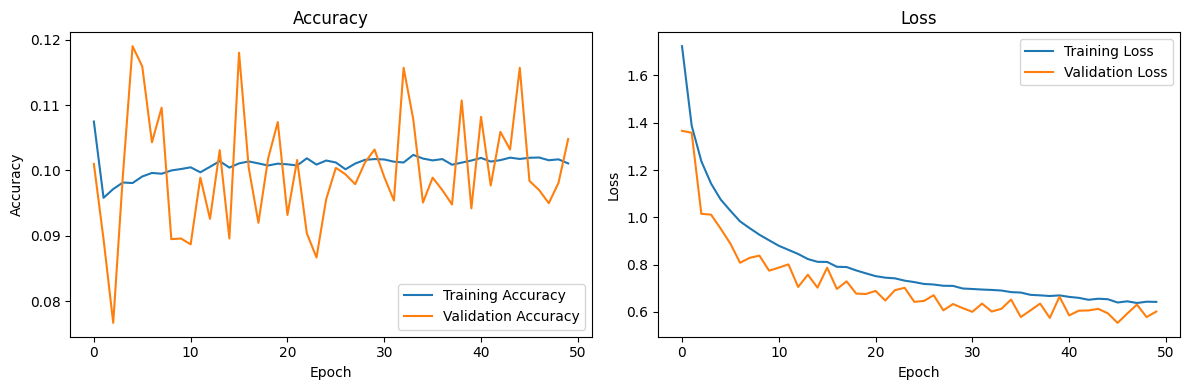

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)

history = model.fit(datagen.flow(x_train, y_train, batch_size=128),epochs=50,validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()